In [11]:
import pandas as pd
import numpy as np

In [12]:
# Load historical data on various marketing channels
marketing_data = pd.read_csv('/content/CC GENERAL.csv')

# Load customer journey data
customer_journey_data = pd.read_csv('/content/customer_id_date_touchpoint - customer_id_date_touchpoint.csv (1).csv')

# Load competitive marketing activity data
competitive_data = pd.read_csv('/content/competitive_data - Sheet1.csv')


In [13]:
print("Marketing Data Columns:", marketing_data.columns)
print("Customer Journey Data Columns:", customer_journey_data.columns)
print("Competitive Data Columns:", competitive_data.columns)


Marketing Data Columns: Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
Customer Journey Data Columns: Index(['CUST_ID', 'date', 'touchpoint'], dtype='object')
Competitive Data Columns: Index(['date', 'competitor_activity', 'impact_on_sales', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


In [14]:
print(marketing_data.columns)
print(customer_journey_data.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
Index(['CUST_ID', 'date', 'touchpoint'], dtype='object')


In [15]:
print(marketing_data['CUST_ID'].dtype)
print(customer_journey_data['CUST_ID'].dtype)

object
int64


In [16]:
marketing_data = marketing_data[marketing_data['CUST_ID'].str.isnumeric()]

In [17]:
marketing_data['CUST_ID'] = marketing_data['CUST_ID'].astype('str')

In [18]:
if marketing_data['CUST_ID'].dtype == 'object':
    marketing_data['CUST_ID'] = marketing_data['CUST_ID'].astype('int64')
elif customer_journey_data['CUST_ID'].dtype == 'object':
    customer_journey_data['CUST_ID'] = customer_journey_data['CUST_ID'].astype('int64')

In [19]:
merged_data = pd.merge(marketing_data, customer_journey_data, on='CUST_ID')

In [20]:
from scipy.stats import zscore

In [21]:
!pip install scipy

In [22]:
from scipy import stats as st
import pandas as pd

In [23]:
# Check if the 'sales' column exists
if 'sales' in merged_data.columns:
    # Calculate z-scores for the 'sales' column
    merged_data['sales_zscore'] = st.zscore(merged_data['sales'])
else:
    print("The 'sales' column is not present in the DataFrame.")

The 'sales' column is not present in the DataFrame.


In [24]:
from scipy.stats import zscore

# Assuming 'BALANCE' is the column for which you want to calculate z-scores
merged_data['BALANCE_zscore'] = zscore(merged_data['BALANCE'])

# Check for missing values
print("Missing values in merged_data:")
print(merged_data.isnull().sum())

# Handle missing values
merged_data = merged_data.dropna()

# Handle duplicates
merged_data = merged_data.drop_duplicates()

# Calculate z-scores for the 'BALANCE' column
merged_data['BALANCE_zscore'] = zscore(merged_data['BALANCE'])

# Define a threshold for identifying outliers
outlier_threshold = 3

# Identify and handle outliers
merged_data_no_outliers = merged_data[(merged_data['BALANCE_zscore'] < outlier_threshold) & (merged_data['BALANCE_zscore'] > -outlier_threshold)]

# Drop the z-score column as it's no longer needed
merged_data_no_outliers = merged_data_no_outliers.drop(columns=['BALANCE_zscore'])

# Save the dataset without outliers
merged_data_no_outliers.to_csv('cleaned_data_no_outliers.csv', index=False)


Missing values in merged_data:
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
CUST_ID                             0.0
date                                0.0
touchpoint                          0.0
BALANCE_zscore                      0.0
dtype: float64


In [25]:
import statsmodels.api as sm

In [26]:
print(merged_data.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CUST_ID', 'date', 'touchpoint', 'BALANCE_zscore'],
      dtype='object')


In [27]:
all_columns = set(merged_data.columns)
required_columns = {'CUST_ID', 'date', 'touchpoint'}

missing_columns = required_columns - all_columns

if missing_columns:
    raise ValueError(f"Missing columns in merged_data: {missing_columns}")

In [28]:
import pandas as pd
from datetime import datetime

# Simulating data collection
# Replace this with your actual data collection process

# Marketing channel data
marketing_data = {
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'TV_Advertising': [10000, 12000, 11000],
    'Online_Advertising': [8000, 9000, 9500],
    'Radio_Advertising': [5000, 5500, 6000],
}

marketing_df = pd.DataFrame(marketing_data)
marketing_df['Date'] = pd.to_datetime(marketing_df['Date'])

# Customer journey data
customer_journey_data = {
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'Impressions': [500000, 550000, 600000],
    'Clicks': [10000, 12000, 15000],
    'Conversions': [500, 600, 700],
}

customer_journey_df = pd.DataFrame(customer_journey_data)
customer_journey_df['Date'] = pd.to_datetime(customer_journey_df['Date'])

# Competitive marketing activity data
competitor_data = {
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'Competitor_Advertising': [8000, 8500, 9000],
}

competitor_df = pd.DataFrame(competitor_data)
competitor_df['Date'] = pd.to_datetime(competitor_df['Date'])

# Merge dataframes on the 'Date' column
merged_data = pd.merge(marketing_df, customer_journey_df, on='Date')
merged_data = pd.merge(merged_data, competitor_df, on='Date')

# Display the merged dataframe
print(merged_data)


        Date  TV_Advertising  Online_Advertising  Radio_Advertising  \
0 2022-01-01           10000                8000               5000   
1 2022-01-02           12000                9000               5500   
2 2022-01-03           11000                9500               6000   

   Impressions  Clicks  Conversions  Competitor_Advertising  
0       500000   10000          500                    8000  
1       550000   12000          600                    8500  
2       600000   15000          700                    9000  


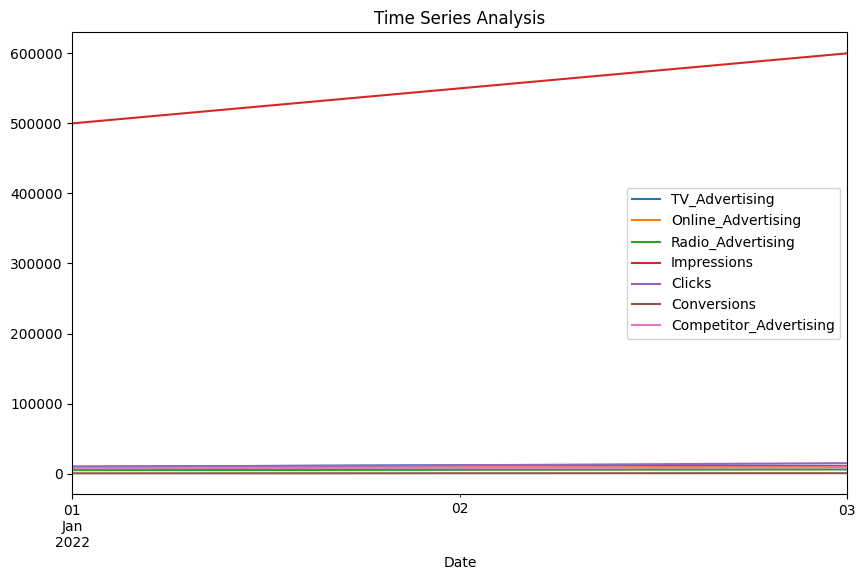

In [29]:
import matplotlib.pyplot as plt

# Set 'Date' as the index for time series analysis
merged_data.set_index('Date', inplace=True)

# Plotting time series data
merged_data.plot(figsize=(10, 6), title='Time Series Analysis')
plt.show()


In [30]:
print(merged_data.columns)


Index(['TV_Advertising', 'Online_Advertising', 'Radio_Advertising',
       'Impressions', 'Clicks', 'Conversions', 'Competitor_Advertising'],
      dtype='object')


In [31]:
import pandas as pd
import statsmodels.api as sm

# Assuming your target variable name is different, replace 'Sales' with the correct name
y = merged_data['Competitor_Advertising']

# Assuming these are your marketing channels, replace with actual column names
X = merged_data[['TV_Advertising', 'Radio_Advertising', 'Online_Advertising']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Competitor_Advertising   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                    nan
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 06 Mar 2024   Prob (F-statistic):                nan
Time:                            09:45:07   Log-Likelihood:                 68.227
No. Observations:                       3   AIC:                            -130.5
Df Residuals:                           0   BIC:                            -133.2
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [32]:
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Continue from the previous code

# Assuming 'conversion' is the binary conversion indicator
# Simulating binary conversion based on a threshold
merged_data['conversion'] = (merged_data['Conversions'] > 600).astype(int)

# Features for attribution modeling
X_attr = merged_data[['TV_Advertising', 'Radio_Advertising', 'Online_Advertising']]

# Target variable for conversion
y_attr = merged_data['conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_attr, y_attr, test_size=0.2, random_state=42)

# Fit a logistic regression model
attr_model = LogisticRegression()
attr_model.fit(X_train, y_train)

# Predictions on the test set
predictions = attr_model.predict(X_test)

# Evaluate model accuracy or other relevant metrics
accuracy = accuracy_score(y_test, predictions)

# Print or save the results
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


**Time Series Plot: Marketing Channels Performance Over Time**

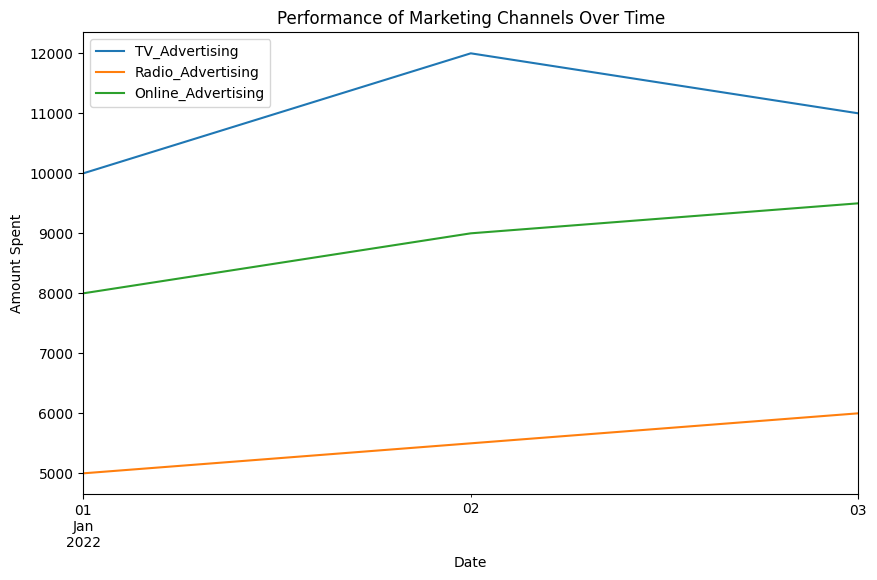

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Continue from the previous code

# Plotting the performance of marketing channels over time using the index
merged_data[['TV_Advertising', 'Radio_Advertising', 'Online_Advertising']].plot(figsize=(10, 6))
plt.title('Performance of Marketing Channels Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.show()


**Marketing Channel Performance Over Time:**

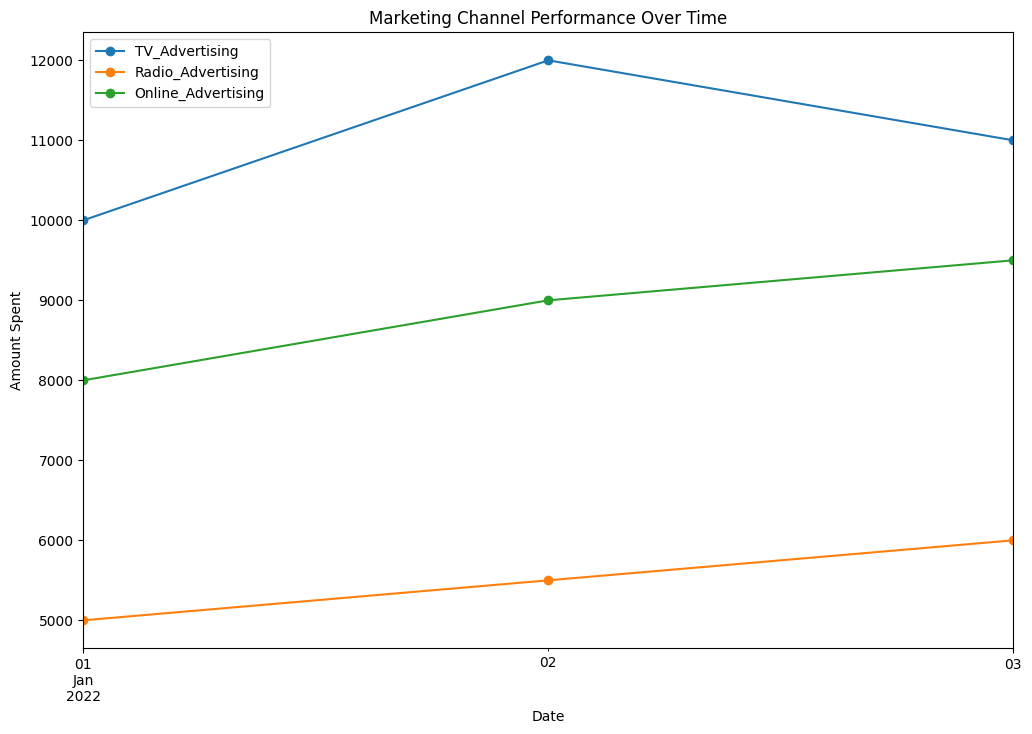

In [34]:
merged_data[['TV_Advertising', 'Radio_Advertising', 'Online_Advertising']].plot(figsize=(12, 8), marker='o')
plt.title('Marketing Channel Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.legend(loc='upper left')
plt.show()


**Customer Engagement Metrics Over Time**

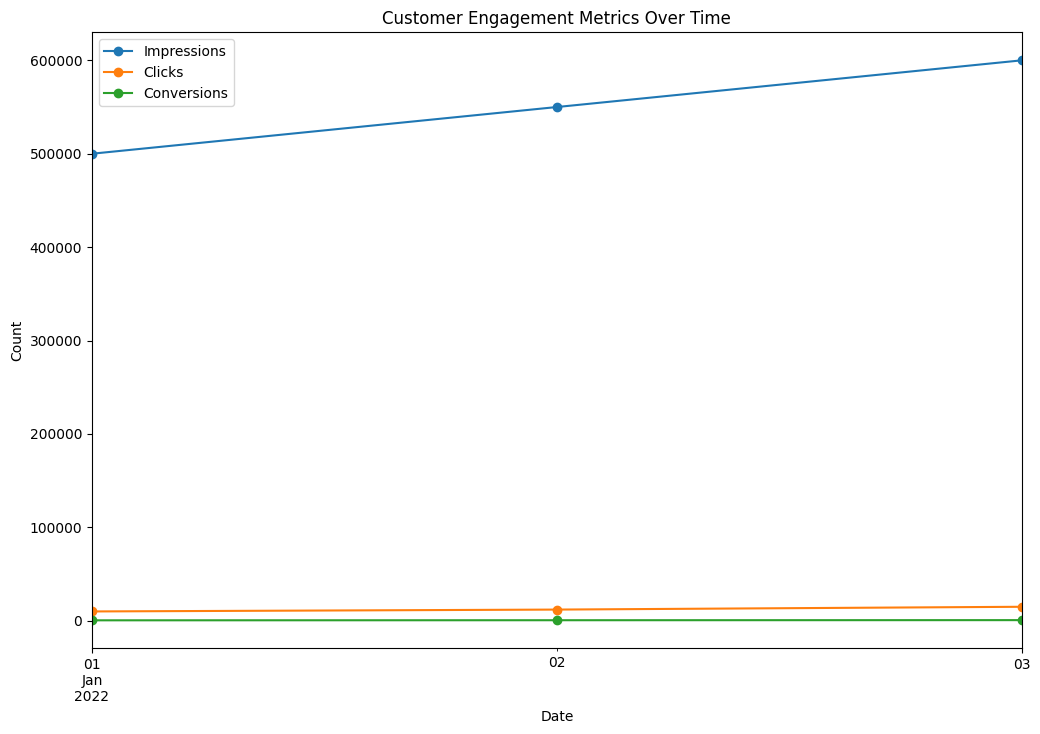

In [35]:
merged_data[['Impressions', 'Clicks', 'Conversions']].plot(figsize=(12, 8), marker='o')
plt.title('Customer Engagement Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()


**Competitor Advertising Comparison**

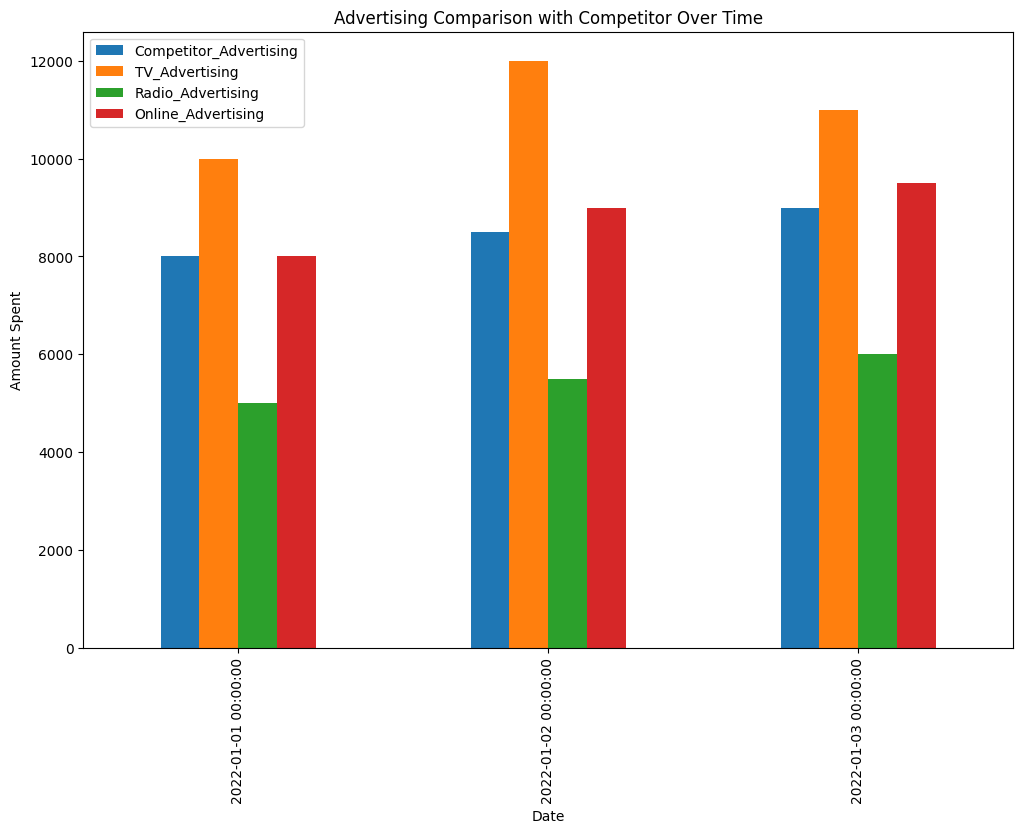

In [36]:
merged_data[['Competitor_Advertising', 'TV_Advertising', 'Radio_Advertising', 'Online_Advertising']].plot(kind='bar', figsize=(12, 8))
plt.title('Advertising Comparison with Competitor Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.legend(loc='upper left')
plt.show()


**Conversion Rate Over Time**

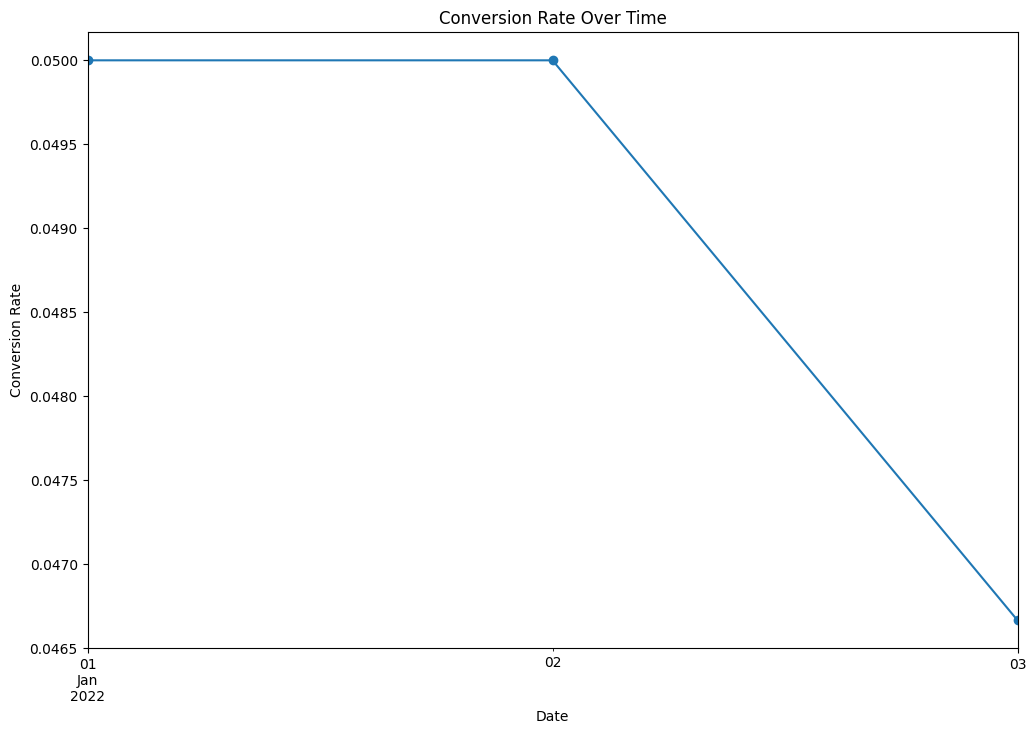

In [37]:
merged_data['Conversion Rate'] = merged_data['Conversions'] / merged_data['Clicks']
merged_data['Conversion Rate'].plot(figsize=(12, 8), marker='o')
plt.title('Conversion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()


**Integrated Performance Metrics**

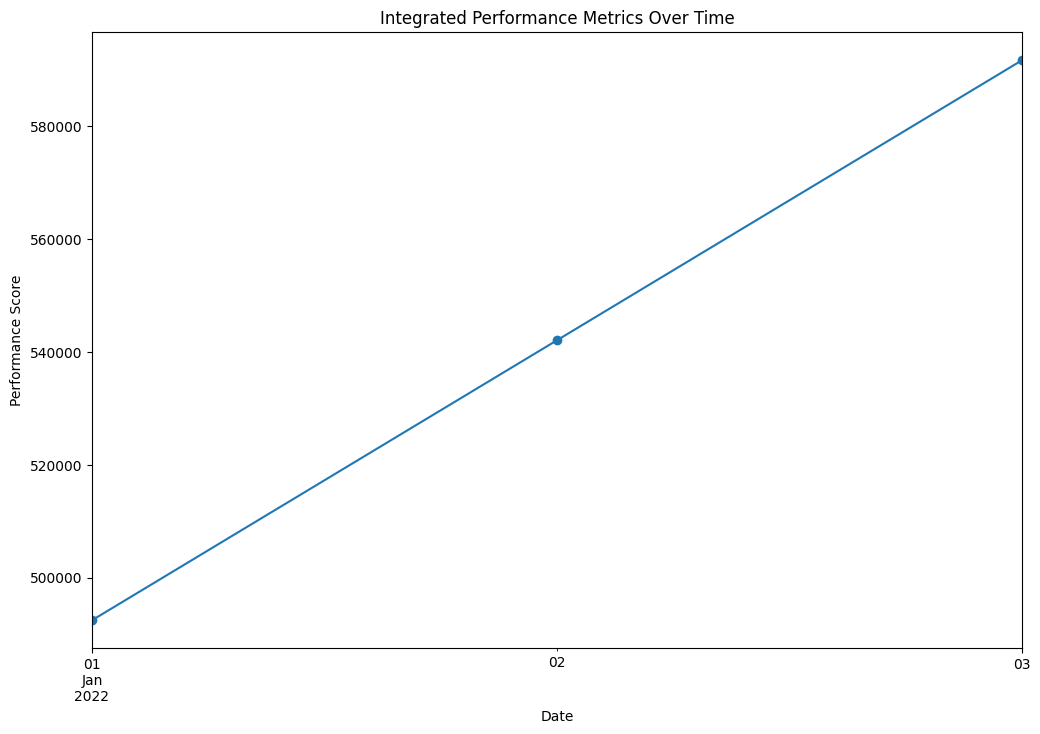

In [38]:
merged_data['Total Performance'] = (
    merged_data['Conversions'] + merged_data['Impressions'] - merged_data['Competitor_Advertising']
)
merged_data['Total Performance'].plot(figsize=(12, 8), marker='o')
plt.title('Integrated Performance Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Score')
plt.show()
